# Multilayer perceptrons (MLPs)

**Course**: Computer Vision (911.908)    
**Author**: Roland Kwitt (Dept. of Computer Science, Univ. of Salzburg)       
Winter term 2019/20

In this lecture, we will learn about a multi-layer extension of the simple perceptron model, aka **Multilayer Perceptrons (MLPs)** and also look at more interesting **activation functions**. Finally, we will briefly look at the **universal approximation theorem** for MLPs and some extensions.

---
## Content

- [Model](#Model)
- [Activation functions](#Activation-functions)
- [Universal approximation theorem](#Universal-approximation-theorem-(UAT))   
- [Exercises](#Exercises)

---
## Model

In the perceptron model, we directly map from inputs to $\{0,1\}$ via

$$ f(\mathbf{x},\mathbf{w}) = \phi (\langle \mathbf{x},\mathbf{w}\rangle)
$$

where the bias is included in $\mathbf{w}$ and $\mathbf{x}$ is extended by a 1 at position 0. $\phi$ (activation) was the threshold function.

However, we do not necessarily have to map to $\mathbb{R}^d \to \mathbb{R}$ and then apply a threshold as an activation function.

In general, we could have a mapping

$$ f: \mathbb{R}^d \to \mathbb{R}^e, \quad \mathbf{x} \mapsto \psi( \mathbf{W} \mathbf{x}+ \mathbf{b})$$

with a general activation function $\psi: \mathbb{R} \to \mathbb{R}$ which is applied pointwise, $\mathbf{x} \in \mathbb{R}^{d}$, $\mathbf{W} \in \mathbb{R}^{d \times e}$ and $\mathbf{b} \in \mathbb{R}^e$.
 
In fact, this concept can be used to build up a hierarchy of operations, e.g.:

$$\forall l=1,\ldots,L: \mathbf{x}^{(l)} = 
\psi\left( \mathbf{W}^{(l)} \mathbf{x}^{(l)} + \mathbf{b}^{(l)}\right)
$$

where $\mathbf{x}^{(0)} = \mathbf{x}$ (input) and $\mathbf{x}^{(l-1)}$ denotes the output at *layer* $l-1$. Overall, the function implemented this way is 

$$
f\left(\mathbf{x}, \{\mathbf{W}^{(l)}\}_l, \{\mathbf{b}^{(l)}\}_l\right) = \mathbf{x}^{(L)}
$$

We call such a model a **multilayer perceptron (MLP)**. Notably, if $\psi$ is linear, then $f$ is an affine function and we could implement this hierarchy by a **single** layer.

Adhering to the terminology, we would call the perceptron a zero hidden layer MLP. We will discuss an important property of a *one hidden layer MLP* later.

--- 

## Activation functions

Below are some common activation functions.

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
from torch.nn.functional import relu, sigmoid
import torch

**Hyperbolic tangent**

$$\tanh(z) = \frac{\sinh(z)}{\cosh(s)}$$

**Rectified Linear Unit (ReLU)**

$$\text{ReLU}(z) = \max\{0,z\}$$

**Sigmoid**

$$\text{sigm}(z) = \frac{1}{1+\exp(-z)}$$

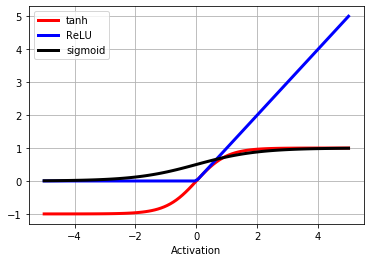

In [8]:
z = torch.linspace(-5,5,100)

plt.plot(z.numpy(), 
         torch.tanh(z).numpy(), 
         linewidth=3, color='red', label='tanh')

plt.plot(z.numpy(), 
         torch.relu(z).numpy(), 
         linewidth=3, color='blue', label='ReLU')

plt.plot(z.numpy(), 
         torch.sigmoid(z).numpy(), 
         linewidth=3, color='black', label='sigmoid')

plt.grid()
plt.xlabel('z');
plt.xlabel('Activation')
plt.legend();

---

## Universal approximation theorem (UAT)

The universal approximation theorem is very well stated on [Wikipedia](https://en.wikipedia.org/wiki/Universal_approximation_theorem).

Let $\psi: \mathbb{R} \to \mathbb{R}$ be a nonconstant, bounded, and continuous function. Let $I_m$ denote the $m$-dimensional unit hypercube $[0,1]^m$. The space of real-valued continuous functions on $I_m$ is denoted by $\mathcal{C}(I_m)$. Then, given any $\epsilon>0$ and any function $f \in \mathcal{C}(I_m)$, there exists an integer $N$, real constants $v_i,b_i \in \mathbb{R}$ and real vectors $\mathbf{w}_i \in \mathbb{R}^m$ for $i=1,\ldots,N$ such that we may define

$$
F(\mathbf{x}) = \sum_{i=1}^N v_i \psi(\mathbf{w}_i^\top \mathbf{x}+b_i)
$$

as an approximate realization of the function $f$, i,e.,. 

$$
\forall \mathbf{x} \in I_m : |F(\mathbf{x}-f(\mathbf{x})| < \epsilon
$$

Hence, functions of the form $F(\mathbf{x})$ are *dense* in 
$\mathcal{C}(I_m)$ and we can approximate $f$ to arbitrary accuracy. A first variant of this theorem was obtained by Cybenko (1989) and later extended by Hornik (1991).

**Remark**: The theorem is an *existence* statement and does not say anything about whether we can actually obtain such an approximation via optimization of a one hidden layer MLP.

**Extension 1**

The result also holds when replacing $I_m$ by any compact subset of $\mathbb{R}^m$.

**Extension 2**

You may have noticed the assumptions on $\psi$, i.e., non-constant, bounded and continuous. Obviously, the most common activation function used in deep learning, i.e., the ReLU, is unbounded. Fortunately, Sonoda & Murata (2015) showed that the universal approximation property is also obtained with ReLU's, see [here](https://arxiv.org/pdf/1505.03654.pdf).




### Experiment

Lets create some 1D toy data for $f(x) = \sin(x)$ first with $x \in [-2\pi,2\pi]$ (also adding some normally distributed noise).

In [9]:
import numpy as np
import math

function_to_learn = lambda x: np.sin(x) + \
    0.1*np.random.randn(*x.shape)

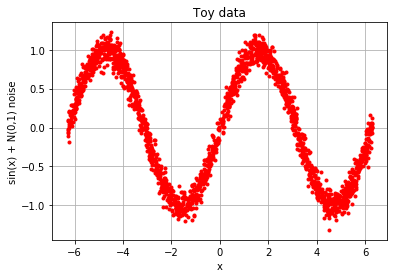

In [13]:
# Training
trn_x = np.float32(
    np.random.uniform(-2*math.pi, 
                      +2*math.pi, 
                      (1, 1000))).T
# Testing
tst_x = np.float32(
    np.random.uniform(-2*math.pi, 
                      +2*math.pi, 
                      (1, 1000))).T

all_x = np.concatenate((trn_x, tst_x),axis=0)
plt.plot(all_x, function_to_learn(all_x), 'r.')
plt.xlabel('x')
plt.ylabel('sin(x) + N(0,1) noise')
plt.title('Toy data')
plt.grid();

Lets create our one hidden layer network, parametrized by the number of hidden units `H`. We'll have `D_in=1` and `D_out=1` in our experiment.

In [14]:
class Net(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.w1 = torch.nn.Linear(D_in, H)
        self.w2 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        x = torch.relu(self.w1(x))
        x = self.w2(x)
        return x

Next, we instantiate the model.

In [15]:
model = Net(1, 80, 1)

Then, we (1) define our loss - which will be the mean-squared-error (MSE) - and (2) set the optimizer to Adam with a learning rate of $0.001$ (we will learn more about Adam later). We train for $10,000$ epochs, i.e., $10,000$ runs over all our $1,000$ samples.

In [16]:
criterion = torch.nn.MSELoss(
    reduction='sum')
optimizer = torch.optim.Adam(
    model.parameters(), lr=1e-3)

x = torch.tensor(all_x, 
                 dtype=torch.float32)
y = torch.tensor(function_to_learn(all_x), 
                 dtype=torch.float32)

for t in range(10000):
    
    optimizer.zero_grad()

    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    
    if t % 1000 == 0:
        print('Epoch {:5d} | Loss: {:.2f}'.format(
            t, loss.item()))

Epoch     0 | Loss: 1420.12
Epoch  1000 | Loss: 114.05
Epoch  2000 | Loss: 26.94
Epoch  3000 | Loss: 21.65
Epoch  4000 | Loss: 20.96
Epoch  5000 | Loss: 20.80
Epoch  6000 | Loss: 20.84
Epoch  7000 | Loss: 20.66
Epoch  8000 | Loss: 20.62
Epoch  9000 | Loss: 20.61


Ok, lets evaluate our model on unseen data.

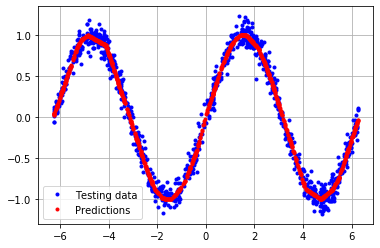

In [17]:
tst_x_tensor = torch.tensor(tst_x)

plt.plot(tst_x, 
         function_to_learn(tst_x),'b.', 
         label='Testing data')
plt.plot(tst_x, 
         model(tst_x_tensor).detach().numpy(),'r.', 
         label='Predictions')
plt.grid()
plt.legend();

**Not bad!** As the UAT also does not state anything about the relation to the number of hidden units ($N$ in the theorem), you sort of have to play around with this term to see the effect.